In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from data.keywords import positive, negative
import re
import collections

<h2>Evaluation</h2>

In [76]:
bist100 = pd.read_csv("../bist100/bist100.csv", delimiter=";")
bist100 = bist100.drop(columns=["Unnamed: 5"])

name_dict = dict()
trust_dict = dict()
for index, row in bist100.iterrows():
    code = row["code"]
    trust_dict[code] = 0

    name_list = list()
    name_list.append(code)
    for name in re.split(r'\s+|\|', row["company"]):
        name_list.append(name)
    name_dict[code] = name_list

In [77]:
for date in os.listdir("news"):
    for agenta in os.listdir(f"news/{date}"):
        f = open(f"news/{date}/{agenta}")
        new_list = f.read().split("-"*50)
        trust = 0
        for new in new_list:
            will_evaluated = list()
            for key, values in name_dict.items():
                for name in values:
                    if name in new:
                        will_evaluated.append(key)
            for pos in positive:
                if pos in new:
                    trust += 1
            for neg in negative:
                if neg in new:
                    trust -= 1.7
            
            for company_code in will_evaluated:
                trust_dict[company_code] += trust 
        

In [78]:
trust_output = open("data/trust_values.csv", "w")

trust_output.write("code,value\n")

sorted_dict = {k: v for k, v in sorted(trust_dict.items(), key=lambda item: item[1])}
for key, value in sorted_dict.items():
    trust_output.write(f"{key},{value}\n")

<h2>Visualition </h2>

In [79]:
truth_values = pd.read_csv("./data/trust_values.csv")

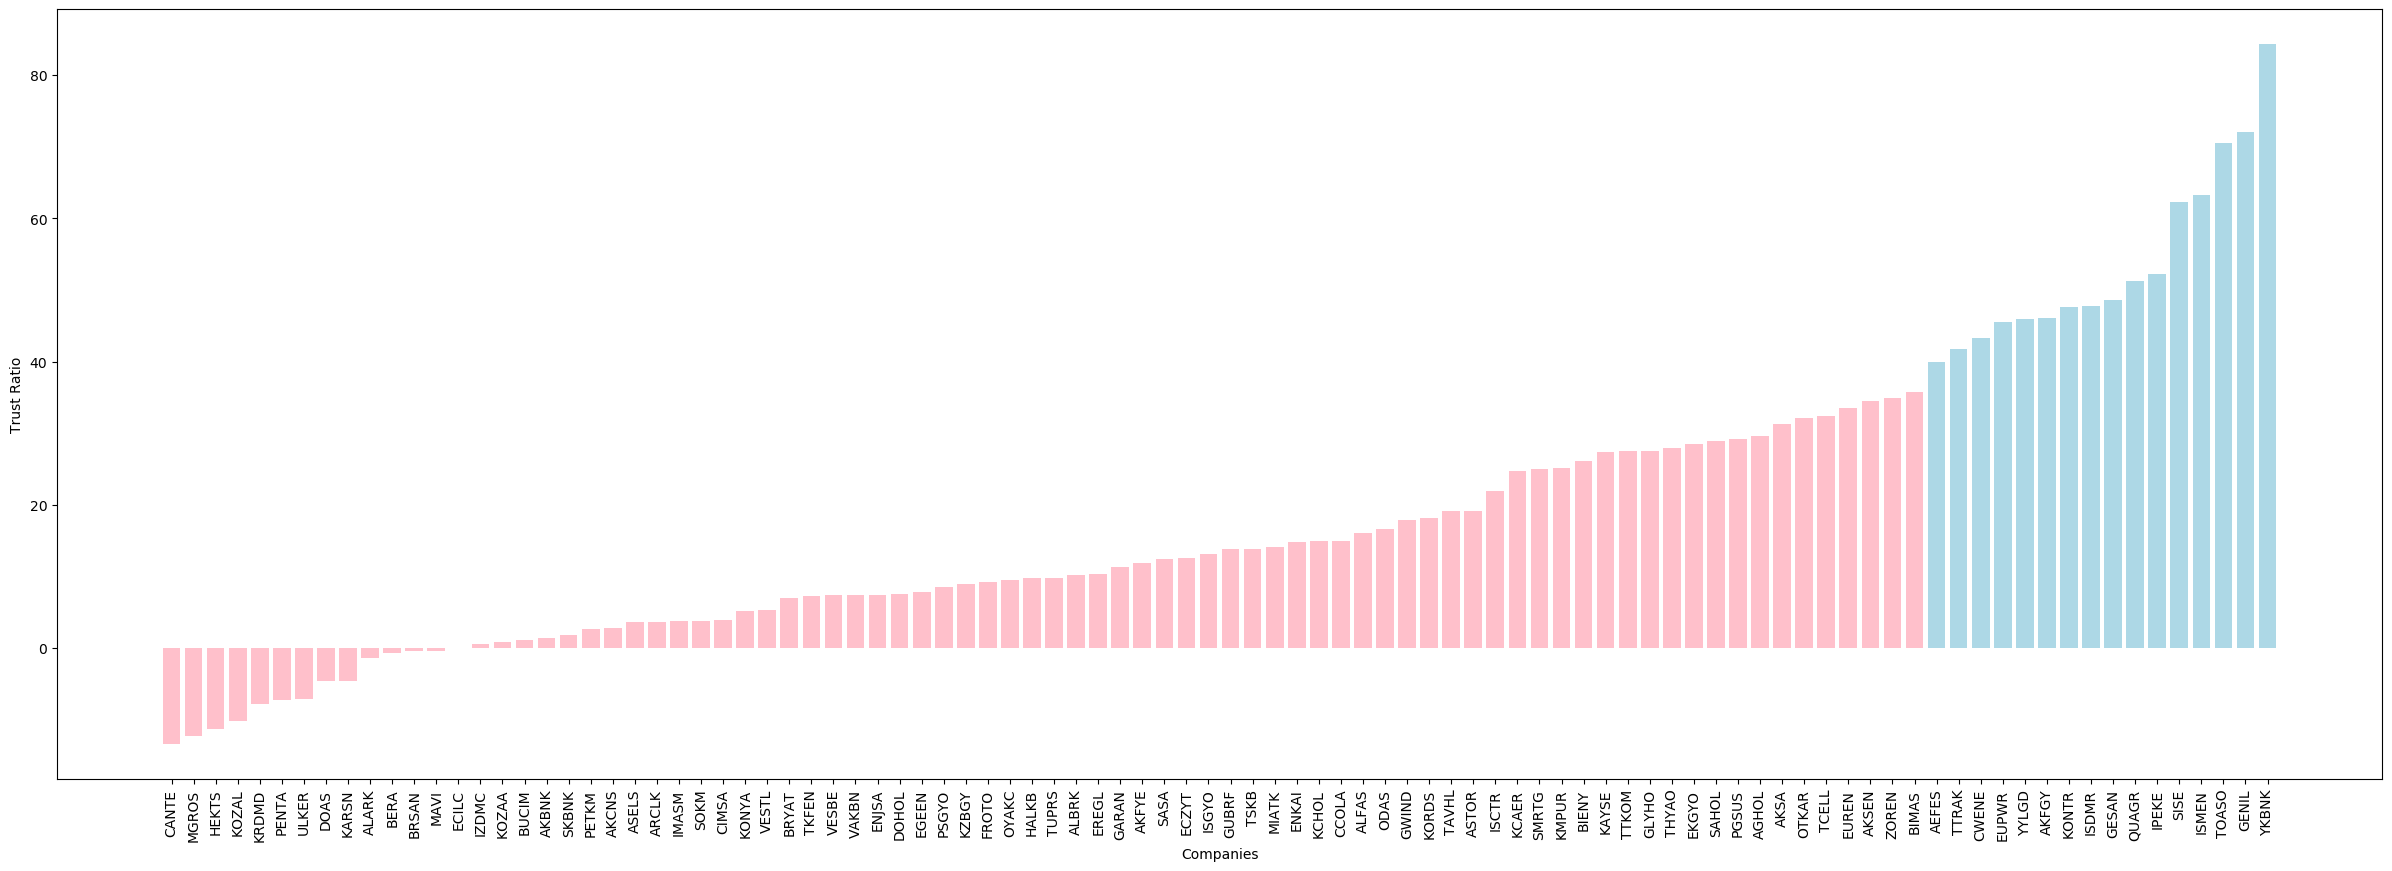

In [80]:
codes = truth_values["code"]
values = truth_values["value"]

filtered_codes_less = list()
filtered_values_less = list()
filtered_codes_more = list()
filtered_values_more = list()
count = 0
for i in range(len(codes)):
    
    if(count < 80):
        count += 1
        filtered_codes_less.append(codes[i])
        filtered_values_less.append(values[i])
    else:
        filtered_codes_more.append(codes[i])
        filtered_values_more.append(values[i])


plt.figure(figsize=(30,10))
plt.bar(filtered_codes_less, filtered_values_less, color="pink")
plt.bar(filtered_codes_more, filtered_values_more, color="lightblue")
plt.ylabel("Trust Ratio")
plt.xlabel("Companies")
plt.xticks(rotation=90)

plt.show()